# **Uploads**

---

Upload necessary files

In [3]:
from google.colab import files
files.upload()

Saving data_generator.py to data_generator.py


{'data_generator.py': b'import random\nimport cv2\nimport numpy as np\n\nfrom imgaug import augmenters as iaa\nfrom tensorflow.keras import datasets\n\n(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()\n\ndef sometimes(aug): return iaa.Sometimes(0.5, aug)\n\nseq = iaa.Sequential([\n    iaa.Affine(\n        scale={"x": (0.8, 1), "y": (0.8, 1)},\n        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},\n        rotate=(-15, 15),\n        shear=(-5, 5),\n        cval=(0, 0),\n        mode=\'constant\'\n    )\n])\n\n\ndef crop_number(number):\n    """\n        Crops a MNIST digit to its containing bounding box with some random noise.\n    """\n    vsum = np.sum(number, axis=0)\n    vsum[vsum > 0] = 1\n    vdif = np.diff(vsum)\n    vdif[vdif > 0] = 1\n    xs = np.argwhere(vdif > 0).ravel()\n\n    random_cut1 = np.random.randint(-1, 3)\n    random_cut2 = np.random.randint(-1, 3)\n\n    try:\n        cropped_number = number[0:28, xs[0] - random_cut1:xs[1] + random_cut2]

# **Imports**

---

Import necessary libraries and set constant variables

In [0]:
%matplotlib inline
import cv2
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from data_generator import training_generator, test_generator

NUM_CLASSES = 255 # number of classes
INPUT_SHAPE = (28, 84, 1) # the size of an image

# **Utils**

---

Utils functions

In [0]:
def show_img(img, label, predicted_label=None):
  plt.figure()
  plt.imshow(img, cmap=plt.get_cmap('gray'))
  plt.colorbar()
  plt.grid(False)
  if predicted_label is None:
    plt.title('True label: {0}'.format(label))
  else:
    plt.title('True label: {0} - Predicted label: {1}'.format(label, predicted_label))

def generate_balanced_data(no_ex_per_class=100, data_type='train'):
  '''
  This function generates balanced training and testing datasets 
  '''
  classes = NUM_CLASSES * [0]
  per = 0
  X = []
  y = []
  
  if data_type == 'train':
    generator = training_generator(batch_size=1)
  elif data_type == 'test':
    generator = test_generator(batch_size=1)
  else:
    raise Exception('Invalid data type!')
  
  while True:
    x, numbers, numbers_sum = next(generator)
    for i in range(2):
      img = x[0, i]
      c = numbers[i]
      
      if classes[c] < no_ex_per_class:
        classes[c] += 1
        X.append(np.expand_dims(img, axis=-1))
        y.append(c)
        
      if int((sum(classes) * 100) / (NUM_CLASSES * no_ex_per_class)) > per:
        per = int((sum(classes) * 100) / (NUM_CLASSES * no_ex_per_class))
        print('--{0}%/100%--'.format(per))

    if (sum(classes) == NUM_CLASSES * no_ex_per_class):
      break
    
  X = np.array(X)
  
  # convert to 1-hot
  y_val = np.array(y)
  y = np.zeros((y_val.shape[0], NUM_CLASSES))
  y[np.arange(y_val.shape[0]), y_val] = 1

  return X, y

# **Solving**

---



Generating training, validationand testing datasets

I chose 500 examples for every class because with fewer examples, the model tends to overfit

In [49]:
X_train, y_train = generate_balanced_data(no_ex_per_class=500, data_type='train')
X_val, y_val = generate_balanced_data(no_ex_per_class=100, data_type='test')
X_test, y_test = generate_balanced_data(no_ex_per_class=100, data_type='test')

--1%/100%--
--2%/100%--
--3%/100%--
--4%/100%--
--5%/100%--
--6%/100%--
--7%/100%--
--8%/100%--
--9%/100%--
--10%/100%--
--11%/100%--
--12%/100%--
--13%/100%--
--14%/100%--
--15%/100%--
--16%/100%--
--17%/100%--
--18%/100%--
--19%/100%--
--20%/100%--
--21%/100%--
--22%/100%--
--23%/100%--
--24%/100%--
--25%/100%--
--26%/100%--
--27%/100%--
--28%/100%--
--29%/100%--
--30%/100%--
--31%/100%--
--32%/100%--
--33%/100%--
--34%/100%--
--35%/100%--
--36%/100%--
--37%/100%--
--38%/100%--
--39%/100%--
--40%/100%--
--41%/100%--
--42%/100%--
--43%/100%--
--44%/100%--
--45%/100%--
--46%/100%--
--47%/100%--
--48%/100%--
--49%/100%--
--50%/100%--
--51%/100%--
--52%/100%--
--53%/100%--
--54%/100%--
--55%/100%--
--56%/100%--
--57%/100%--
--58%/100%--
--59%/100%--
--60%/100%--
--61%/100%--
--62%/100%--
--63%/100%--
--64%/100%--
--65%/100%--
--66%/100%--
--67%/100%--
--68%/100%--
--69%/100%--
--70%/100%--
--71%/100%--
--72%/100%--
--73%/100%--
--74%/100%--
--75%/100%--
--76%/100%--
--77%/100%--
--78%/10

Inspect the dataset

Train examples: 127500
Validation examples: 25500
Test examples: 25500

Visualize data:


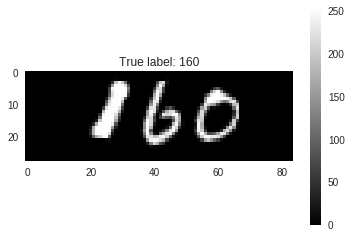

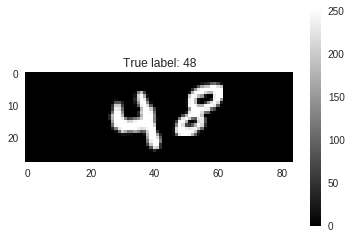

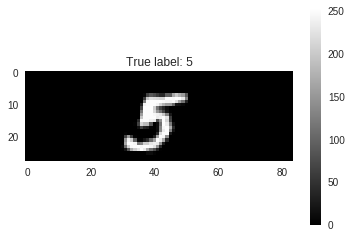

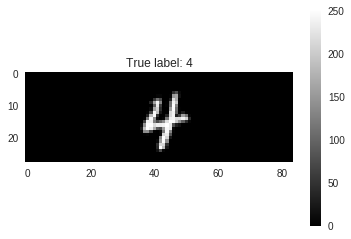

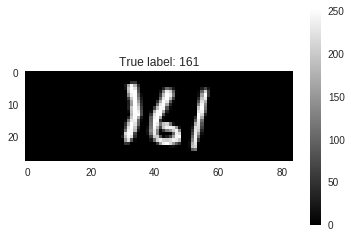

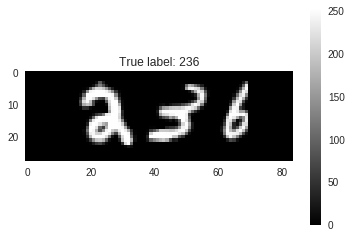

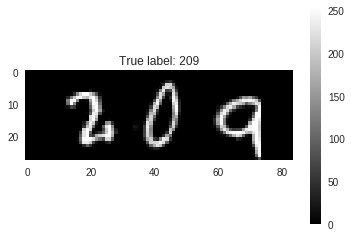

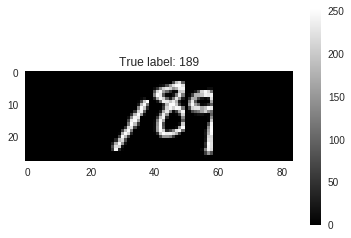

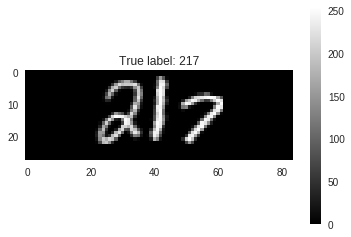

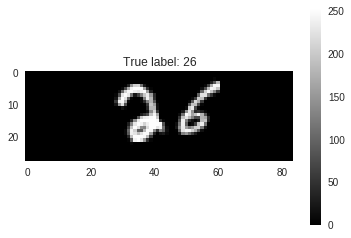

In [9]:
print('Train examples: {0}'.format(X_train.shape[0]))
print('Validation examples: {0}'.format(X_val.shape[0]))
print('Test examples: {0}'.format(X_test.shape[0]))

print('\nVisualize data:')
imgs = np.random.randint(0, X_train.shape[0], size=10)
for img in imgs:
  show_img(X_train[img, :, :, 0], np.argmax(y_train[img]))

Scale the data to be between [0, 1]

In [0]:
X_train_pre = X_train / 255.0
X_val_pre = X_val / 255.0
X_test_pre = X_test / 255.0

Trying multiple hyperparameters and choosing the model with the best validation accuracy

For searching the best hyperparameters, I also included regularzation by using dropout

In [15]:
reg_v = [True, False]
filters_v = [(8, 16), (16, 32)]
kernel_v = [3]
dense_v = [64, 128]

models = []
for reg in reg_v:
  for filters in filters_v:
    for kernel in kernel_v:
      for dense in dense_v:
        model = tf.keras.Sequential()
      
        model.add(tf.keras.layers.Conv2D(filters=filters[0],
                                         kernel_size=kernel,
                                         activation=tf.nn.relu,
                                         input_shape=INPUT_SHAPE))
        model.add(tf.keras.layers.MaxPool2D(pool_size=2))
        model.add(tf.keras.layers.Conv2D(filters=filters[1],
                                         kernel_size=3,
                                         activation=tf.nn.relu))
        model.add(tf.keras.layers.MaxPool2D(pool_size=2))
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(units=dense))
        if reg:
          model.add(tf.keras.layers.Dropout(0.50))
        model.add(tf.keras.layers.Dense(units=NUM_CLASSES,
                                        activation=tf.nn.softmax))
                  
        model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.train.AdamOptimizer(learning_rate=0.001),
              metrics=[tf.keras.metrics.categorical_accuracy])
                  
        print('Training the model..')
        model.fit(X_train_pre, y_train, epochs=11)
                  
        val_loss, val_acc = model.evaluate(X_val_pre, y_val)
        models.append((filters, kernel, dense, reg, val_acc))
                  
models.sort(key=lambda k: k[4], reverse=True)
best_filters, best_kernel, best_dense, best_reg, best_acc = models[0]
                  
print('The best model has the following:\n \
Accuracy on the validation set: {0}\n \
Filters size: {1}, {2}\n \
Kernel size: {3}\n \
Dense size: {4}\n \
Regularization: {5}\n'.format(best_acc, best_filters[0], best_filters[1], best_kernel, best_dense, best_reg))

Training the model..
Epoch 1/11
127500/127500 [==============================] - 24s 192us/step - loss: 2.5254 - categorical_accuracy: 0.3691
Epoch 2/11
127500/127500 [==============================] - 24s 187us/step - loss: 1.1816 - categorical_accuracy: 0.6618
Epoch 3/11
127500/127500 [==============================] - 24s 187us/step - loss: 0.9746 - categorical_accuracy: 0.7158
Epoch 4/11
127500/127500 [==============================] - 24s 185us/step - loss: 0.8762 - categorical_accuracy: 0.7422
Epoch 5/11
127500/127500 [==============================] - 24s 184us/step - loss: 0.8123 - categorical_accuracy: 0.7615
Epoch 6/11
127500/127500 [==============================] - 23s 184us/step - loss: 0.7653 - categorical_accuracy: 0.7730
Epoch 7/11
127500/127500 [==============================] - 23s 184us/step - loss: 0.7345 - categorical_accuracy: 0.7824
Epoch 8/11
127500/127500 [==============================] - 23s 184us/step - loss: 0.7085 - categorical_accuracy: 0.7912
Epoch 9/11


In [0]:
class LossHistory(tf.keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.losses = []
    self.accs = []

  def on_batch_end(self, batch, logs={}):
    self.losses.append(logs.get('loss'))
    self.accs.append(logs.get('categorical_accuracy'))

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=3,
                           activation=tf.nn.relu,
                           input_shape=INPUT_SHAPE),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,
             activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.50),
    tf.keras.layers.Dense(units=NUM_CLASSES,
             activation=tf.nn.softmax)
])

history = LossHistory()

I used the following architecture for the model: After the input, I used a convolutional layer, followed by maxpooling, then another convolutional layer followed by another maxpooling. After, I flattened the output, I applied a fully connected layer, followed by dropout for regularization another fully connected layer used for classification. For the two convolutional layer and the first layer I used relu as the activation function, and for the last layer I used softmax. The optimizer that I used is Adam.

In [17]:
print('This is the model architecture:')
model.summary()

This is the model architecture:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 82, 16)        160       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 41, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 39, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 19, 32)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 3040)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               389248    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)    

In [0]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.train.AdamOptimizer(learning_rate=0.001),
              metrics=[tf.keras.metrics.categorical_accuracy])

In [53]:
model.fit(X_train_pre, y_train, epochs=11, verbose=1, callbacks=[history])

Epoch 1/11
127500/127500 [==============================] - 27s 215us/step - loss: 2.7405 - categorical_accuracy: 0.3191
Epoch 2/11
127500/127500 [==============================] - 27s 213us/step - loss: 1.3191 - categorical_accuracy: 0.6196
Epoch 3/11
127500/127500 [==============================] - 27s 213us/step - loss: 1.0086 - categorical_accuracy: 0.7034
Epoch 4/11
127500/127500 [==============================] - 27s 213us/step - loss: 0.8473 - categorical_accuracy: 0.7473
Epoch 5/11
127500/127500 [==============================] - 27s 213us/step - loss: 0.7419 - categorical_accuracy: 0.7772
Epoch 6/11
127500/127500 [==============================] - 27s 213us/step - loss: 0.6726 - categorical_accuracy: 0.7976
Epoch 7/11
127500/127500 [==============================] - 27s 215us/step - loss: 0.6166 - categorical_accuracy: 0.8134
Epoch 8/11
127500/127500 [==============================] - 27s 213us/step - loss: 0.5678 - categorical_accuracy: 0.8265
Epoch 9/11
127500/127500 [======

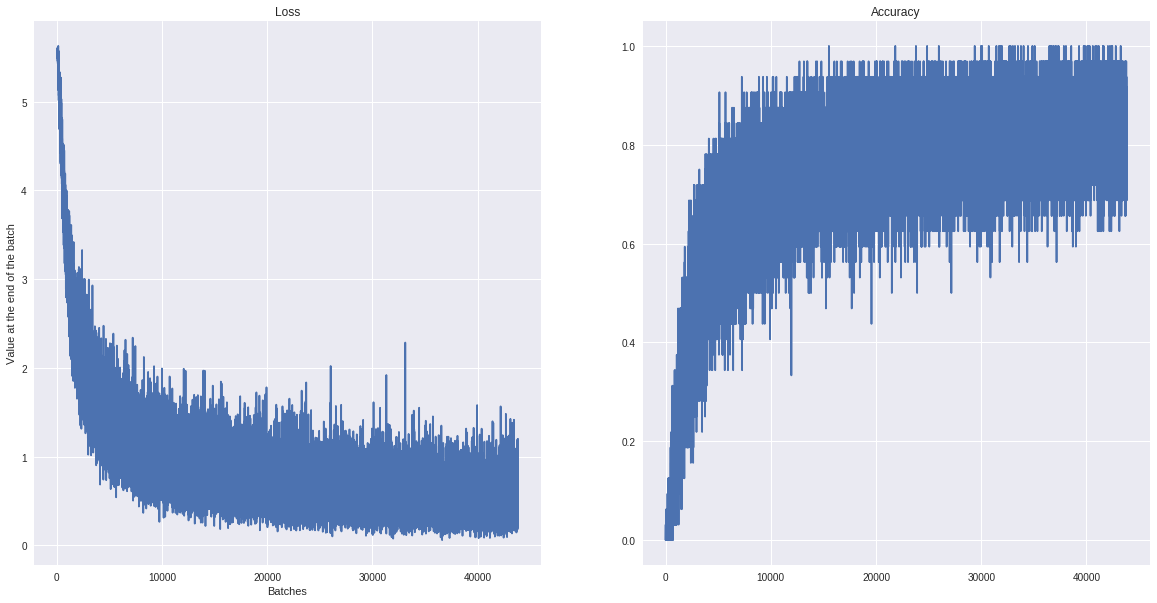

In [21]:
fig = plt.figure(figsize=(20, 10))
ax1, ax2 = fig.subplots(1, 2)
ax1.plot(np.arange(len(history.losses)), history.losses)
ax2.plot(np.arange(len(history.accs)), history.accs)
ax1.set_title('Loss')
ax2.set_title('Accuracy')
ax1.set_xlabel('Batches')
ax1.set_ylabel('Value at the end of the batch')
ax1.set_xlabel('Batches')
ax1.set_ylabel('Value at the end of the batch')
plt.show()

In [22]:
test_loss, test_acc = model.evaluate(X_test_pre, y_test)
print('The accuracy on the test set: {0}'.format(test_acc))

25500/25500 [==============================] - 3s 121us/step
The accuracy on the test set: 0.9301960784033233


Misclassified examples on the test set:


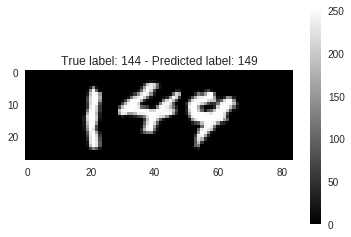

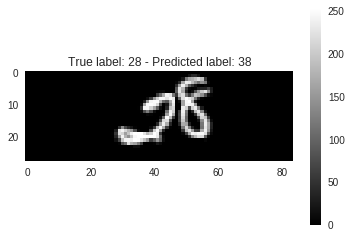

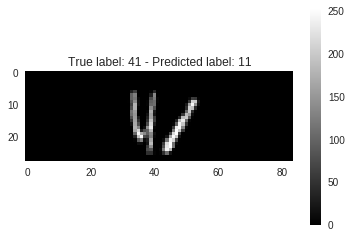

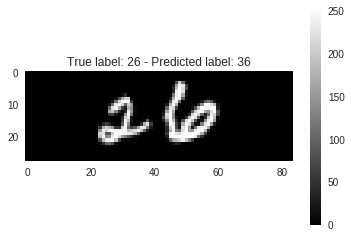

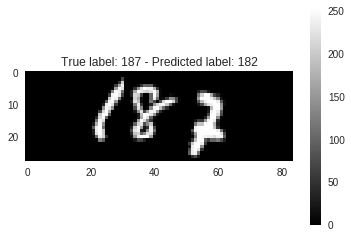

In [23]:
n_examples = 5
n = 0
y_pred = model.predict(X_test_pre)

print('Misclassified examples on the test set:')
for i in range(y_pred.shape[0]):
  y_pred_label = np.argmax(y_pred[i])
  y_test_label = np.argmax(y_test[i])
  
  if y_test_label != y_pred_label:
    n += 1
    show_img(X_test[i, :, :, 0], y_test_label, y_pred_label)
    
  if n == n_examples:
    break

Here I will print the activations from the convolutional layers

In [0]:
layer_name = model.layers[0].name
intermediate_layer_model = tf.keras.Model(inputs=model.input,
                                          outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(X_train_pre[:1, :, :, :])

Original image:


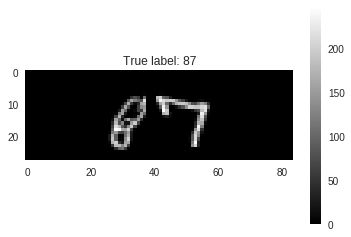

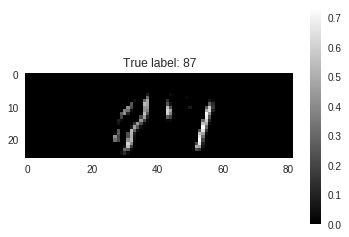

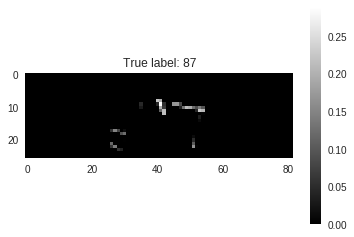

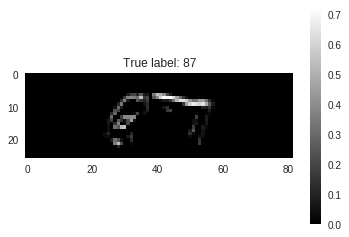

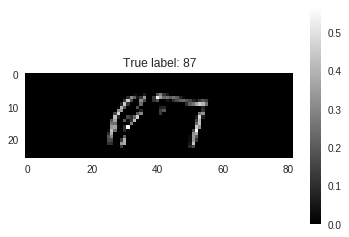

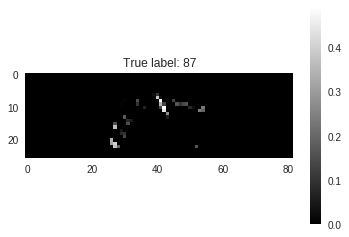

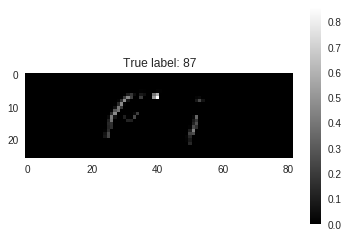

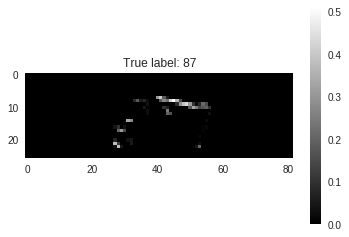

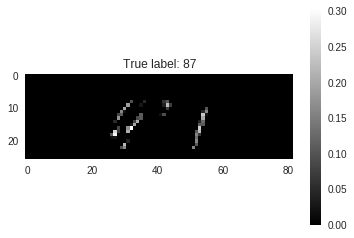

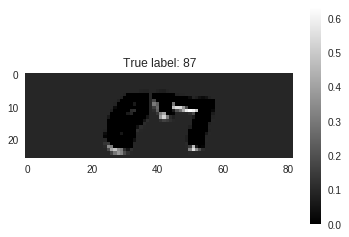

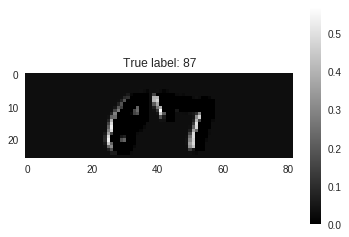

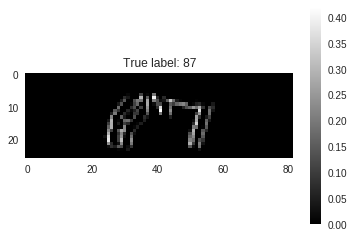

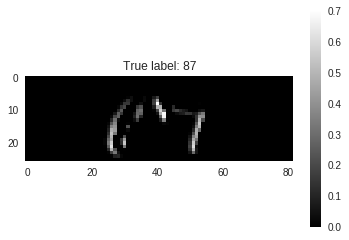

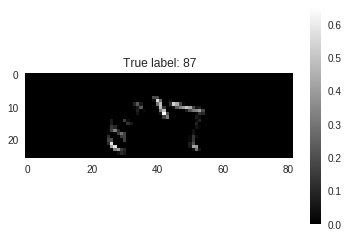

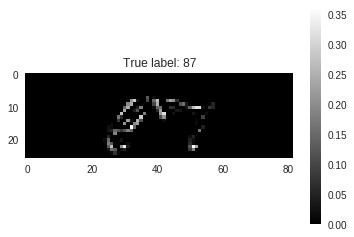

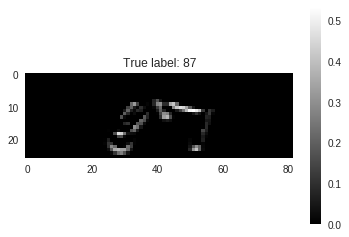

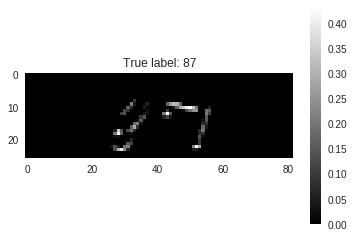

In [55]:
print('Original image:')
show_img(X_train[0, :, :, 0], label=np.argmax(y_train[0]))
for c in range(intermediate_output.shape[3]):
  show_img(intermediate_output[0, :, :, c], label=np.argmax(y_train[0]))

In [0]:
layer_name = model.layers[1].name
intermediate_layer_model = tf.keras.Model(inputs=model.input,
                                          outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(X_train_pre[:1, :, :, :])

Original image:


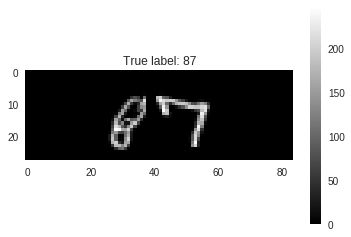

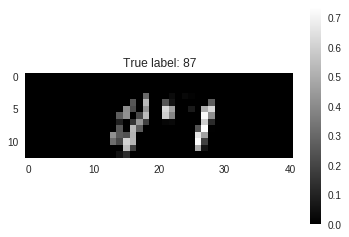

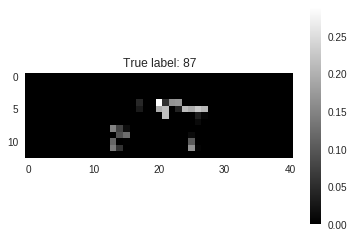

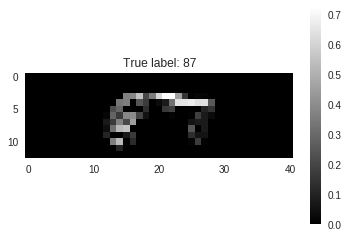

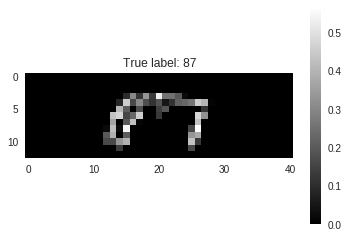

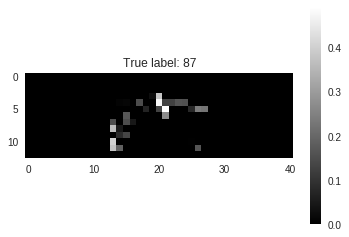

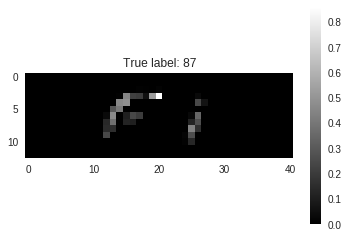

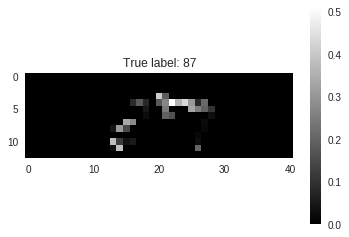

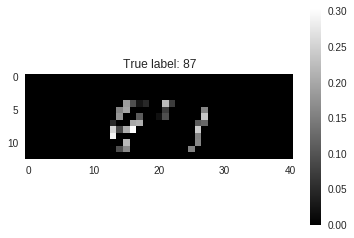

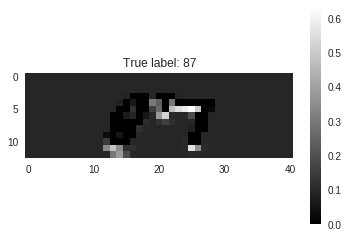

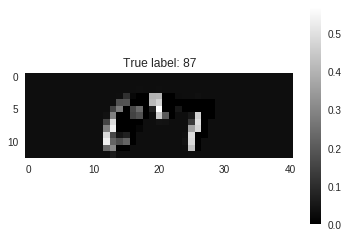

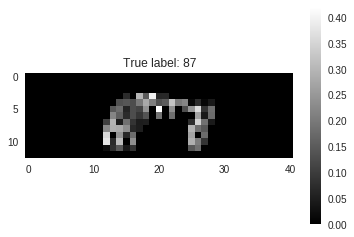

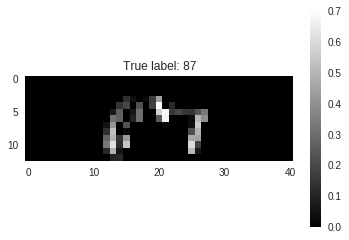

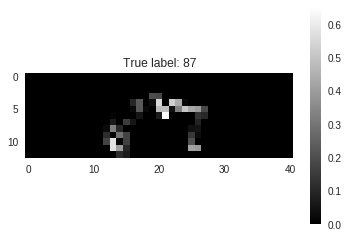

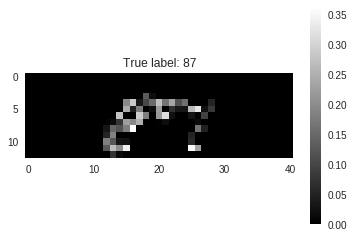

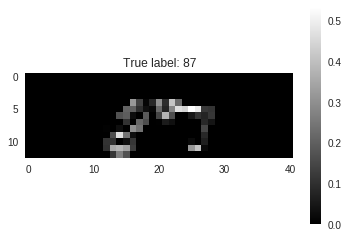

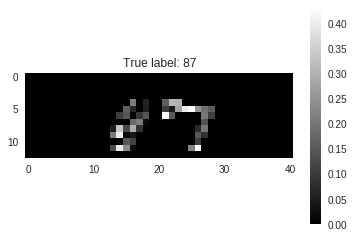

In [57]:
print('Original image:')
show_img(X_train[0, :, :, 0], label=np.argmax(y_train[0]))
for c in range(intermediate_output.shape[3]):
  show_img(intermediate_output[0, :, :, c], label=np.argmax(y_train[0]))